# Library 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read data

In [2]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [11]:
df.shape

(5110, 11)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [7]:
df.drop(['id'],axis=1,inplace=True)

In [12]:
df.isnull().sum().sort_values(ascending = False).head(5)

bmi              201
gender             0
age                0
hypertension       0
heart_disease      0
dtype: int64

In [15]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,fill_value='mean')
df['bmi']=imp.fit_transform(np.array(df['bmi']).reshape(-1,1))

In [59]:
df.isnull().sum().sort_values(ascending = False).head(5)

gender           0
age              0
hypertension     0
heart_disease    0
ever_married     0
dtype: int64

In [58]:
df.duplicated().sum()

0

In [16]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['gender']=lb.fit_transform(df['gender'])
df['ever_married']=lb.fit_transform(df['ever_married'])
df['work_type']=lb.fit_transform(df['work_type'])
df['Residence_type']=lb.fit_transform(df['Residence_type'])
df['smoking_status']=lb.fit_transform(df['smoking_status'])


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int32  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int32  
 5   work_type          5110 non-null   int32  
 6   Residence_type     5110 non-null   int32  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int32  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int32(5), int64(3)
memory usage: 339.5 KB


In [19]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [22]:
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
my_scaler = MinMaxScaler()
X = my_scaler.fit_transform(X)

stroke        : 
 stroke
0    4861
1     249
Name: count, dtype: int64


stroke
0    0.951272
1    0.048728
Name: proportion, dtype: float64


<Axes: title={'center': 'stroke'}, xlabel='stroke'>

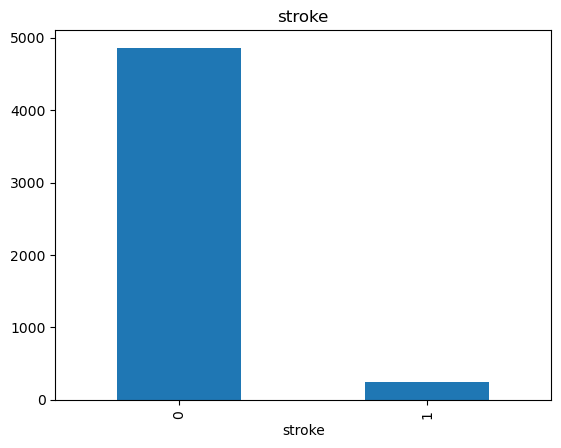

In [25]:
# Lets know how many values
print("stroke        : \n",y.value_counts())
print("\n")
print(y.value_counts(normalize=True))

# plot.bar(title='') function is used to plot bargraph 
y.value_counts().plot.bar(title="stroke")


In [26]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)

In [27]:
X,y=sm.fit_resample(X,y)

In [28]:
X.shape

(9722, 10)

In [29]:
y.shape

(9722,)

stroke        : 
 stroke
1    4861
0    4861
Name: count, dtype: int64


stroke
1    0.5
0    0.5
Name: proportion, dtype: float64


<Axes: title={'center': 'stroke'}, xlabel='stroke'>

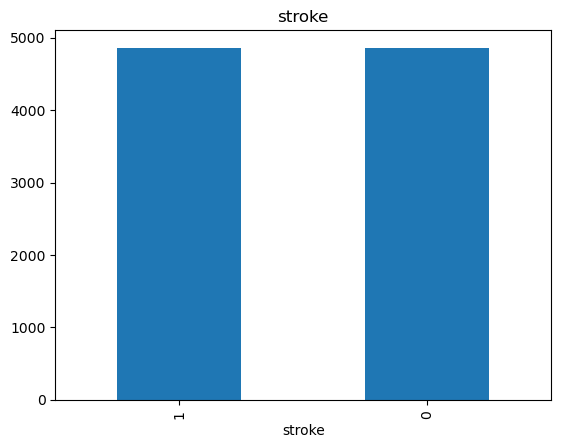

In [30]:
# Lets know how many values
print("stroke        : \n",y.value_counts())
print("\n")
print(y.value_counts(normalize=True))

# plot.bar(title='') function is used to plot bargraph 
y.value_counts().plot.bar(title="stroke")


# Spliting Data 
### train test split

In [31]:
# Split into Input and Output Elements
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                   test_size= 0.20, random_state=100, stratify=y)

In [32]:
X_test.shape ,y_test.shape

((1945, 10), (1945,))

# K-Neighbors

In [62]:
from sklearn.neighbors import KNeighborsClassifier
knnModel = KNeighborsClassifier(n_neighbors=10)
knnModel.fit(X_train,y_train)
print('KNNModel Train Score is : ',knnModel.score(X_train,y_train))
print('KNNModel Test  Score is : ',knnModel.score(X_test,y_test))

KNNModel Train Score is :  0.9044618747589045
KNNModel Test  Score is :  0.8879177377892031


In [63]:
y_pred=knnModel.predict(X_test)

In [66]:
y_pred[:5].tolist(),y_test[:5]

([1, 0, 1, 0, 1],
 1213    0
 4629    0
 8267    1
 7251    1
 6019    1
 Name: stroke, dtype: int64)

In [67]:
from sklearn.metrics import classification_report ,confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[782, 191],
       [ 27, 945]], dtype=int64)

<Axes: >

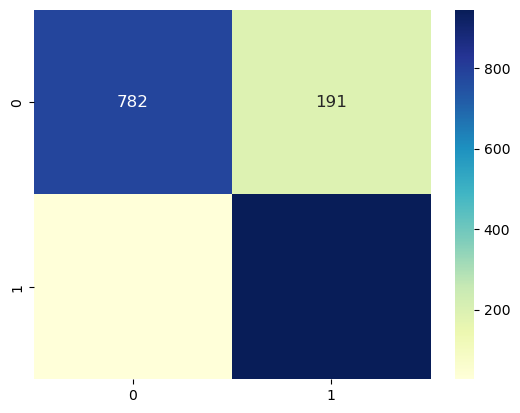

In [69]:
import seaborn as sns
sns.heatmap(cm, annot=True, annot_kws={"size": 12},fmt="g", cbar=True, cmap="YlGnBu")

In [70]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.80      0.88       973
           1       0.83      0.97      0.90       972

    accuracy                           0.89      1945
   macro avg       0.90      0.89      0.89      1945
weighted avg       0.90      0.89      0.89      1945

